In [14]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import scipy as sp
import pywt # wavelet transforms

In [2]:
# read Q{1,2,3}.mat
q1 = sp.io.loadmat('./data/Q1.mat')
q2 = sp.io.loadmat('./data/Q2.mat')
q3 = sp.io.loadmat('./data/Q3.mat')

In [7]:
print(q1.keys())
print(q2.keys())
print(q3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'EEG'])
dict_keys(['__header__', '__version__', '__globals__', 'noisy_EEG'])


In [9]:
y = q1['y']
EEG = q2['EEG']
noisy_EEG = q3['noisy_EEG']

In [13]:
print('type(y):', type(y))
print('type(EEG):', type(EEG))
print('type(noisy_EEG):', type(noisy_EEG))
print('y.shape:', y.shape)
print('EEG.shape:', EEG.shape)
print('noisy_EEG.shape:', noisy_EEG.shape)

type(y): <class 'numpy.ndarray'>
type(EEG): <class 'numpy.ndarray'>
type(noisy_EEG): <class 'numpy.ndarray'>
y.shape: (73113, 1)
EEG.shape: (2500, 1)
noisy_EEG.shape: (2500, 1)


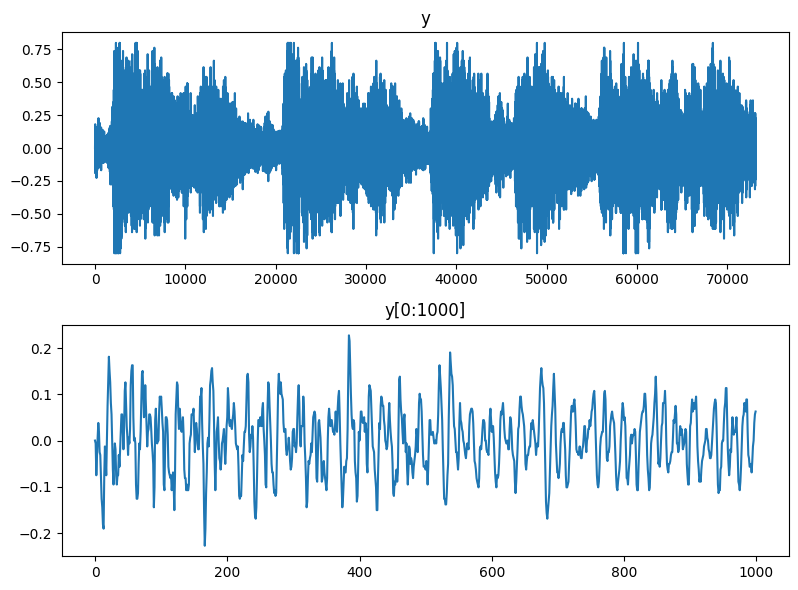

In [24]:
# plot Q1.mat data
_, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(y)
axs[0].set_title('y')
axs[1].plot(y[0:1000])
axs[1].set_title('y[0:1000]')
plt.tight_layout()
plt.show()


### 1.1 Plot the approximated and detailed coefficients

In [20]:
level = 3
coeffs = pywt.wavedec(y,'db2', level=level) # db2 is the name of the Daubechies wavelet
cA3, cD3, cD2, cD1 = coeffs
print('cA3.shape:', cA3.shape)
print('cD3.shape:', cD3.shape)
print('cD2.shape:', cD2.shape)
print('cD1.shape:', cD1.shape)

cA3.shape: (73113, 2)
cD3.shape: (73113, 2)
cD2.shape: (73113, 2)
cD1.shape: (73113, 2)


/home/kristoffer/.local/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


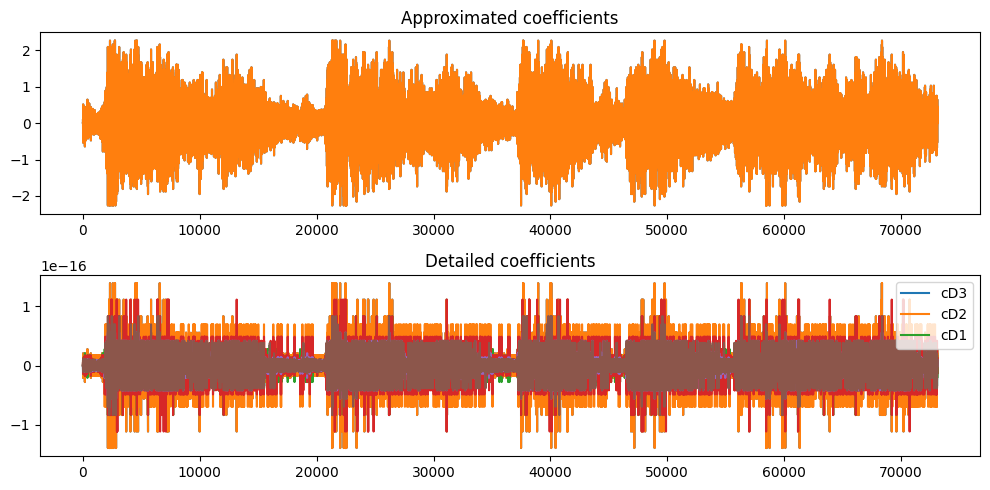

In [21]:
# plot the approximated and detailed coefficients
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(cA3)
plt.title('Approximated coefficients')
plt.subplot(2, 1, 2)
plt.plot(cD3)
plt.plot(cD2)
plt.plot(cD1)
plt.title('Detailed coefficients')
plt.legend(['cD3', 'cD2', 'cD1'])
plt.tight_layout()
plt.show()


### 1.2 Plot the reconstructed signal obtained using `db1` and `db2` wavelets

### 1.3 Hear the reconstructed signal obtained using `db1` and `db2` wavelets. Report on your findings.

In [ ]:
# write reconstructed signal to a temporary waw file
# import wave
# import struct
import tempfile

# NOTE: the file is not created, it only returns a filename string
# that can be used to create the temporary file
file = tempfile.mktemp(suffix='.wav')

# sp.io.wavfile.write(file, 1000, y)



In [ ]:
!mpv --no-video {file} # play the temporary wav file with mpv

### 1.4 Also, comment on the error obtained on the reconstructed signals for `db1` and `db2`.

---
# Problem 2

In [ ]:
mu = 0.0
sigma = 0.1
# gaussian noise
noise = np.random.normal(mu, sigma, EEG.shape)
